In [633]:
#Importar paquetes necesarios
#Pandas
import pandas as pd
import numpy as np
#Seaborn visualizacion de datos
import seaborn as sbn
# Paquetes para seleccion de variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression #que mutual_info_regressiones más adecuado para problemas de regresión no lineal, Si está trabajando con datos categóricos o mixtos
#Paquetes para crear la regresion lineal
from sklearn.linear_model import LogisticRegression
#Paquete para separar muestras 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
#Paquete de metricas
from sklearn import metrics

from sklearn.feature_selection import chi2 # chi2 Estadísticas chi-cuadrado de características no negativas para tareas de clasificación.
#Paquete para separar muestras 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
#Paquete para crear el random forest
from sklearn.ensemble import RandomForestClassifier
#Paquete para balanceo de carga
from imblearn.over_sampling import SMOTE

In [ ]:
#Primer objetivo, analizar y entender la data

In [639]:
dataemployees = pd.read_csv(r'C:\Users\juanm\Desktop\Provisional\Uncleaned_employees_final_dataset (1).csv')
dataemployees.info()
# dataemployees.previous_year_rating.fillna(0,inplace=True)
# dataemployees.education.fillna('unknown',inplace=True)
# dataemployees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [ ]:
#Solucion 1
#dataemployees.dropna(inplace=True)
#remplaza datos faltantes por 0 para no eliminar filas
# dataemployees.previous_year_rating.fillna(0,inplace=True)
# dataemployees.education.fillna('unknown',inplace=True)
# dataemployees.info()

<AxesSubplot:>

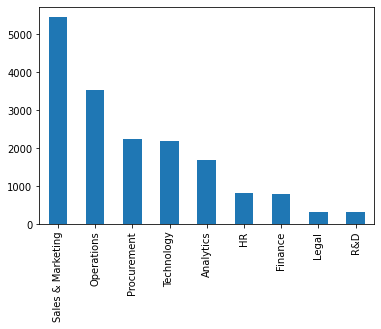

In [640]:
#Revision de department
dataemployees.department.value_counts().plot(kind='bar')

In [ ]:
#Revision de region
dataemployees.region.value_counts().plot(kind='bar')

<AxesSubplot:>

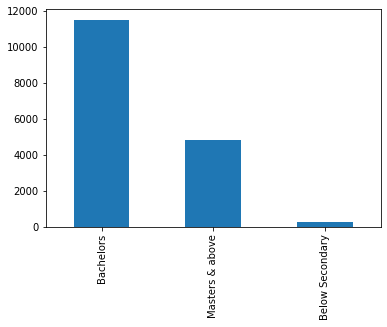

In [641]:
#Revision de region
dataemployees.education.value_counts().plot(kind='bar')

In [ ]:
dataemployees[dataemployees.education.isnull()]

<AxesSubplot:>

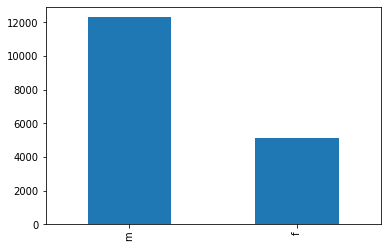

In [642]:
#Revision de genero
dataemployees.gender.value_counts().plot(kind='bar')

In [ ]:
#Revision de genero
dataemployees.recruitment_channel.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

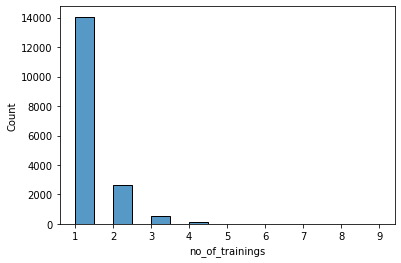

In [654]:
#Revision de numero de entrenamiento
sbn.histplot(data=dataemployees.no_of_trainings)

<AxesSubplot:xlabel='no_of_trainings'>

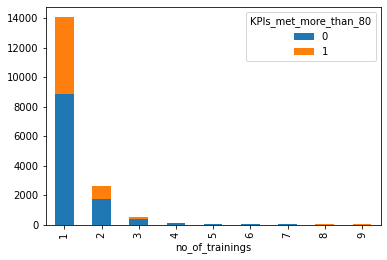

In [659]:
dataemployees.pivot_table(values='employee_id',index='no_of_trainings',columns='KPIs_met_more_than_80',aggfunc='size').plot(kind='bar', stacked=True)

In [ ]:
dataemployees.no_of_trainings.value_counts()

<AxesSubplot:xlabel='age', ylabel='Count'>

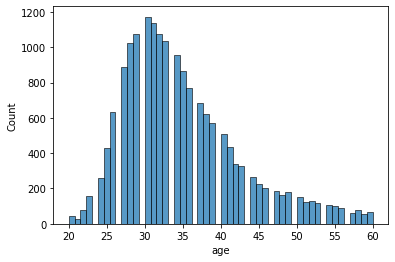

In [667]:
#Revision de numero de edad
sbn.histplot(data=dataemployees.age)

In [668]:
dataemployees.age.describe()

count    17417.000000
mean        34.807774
std          7.694046
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

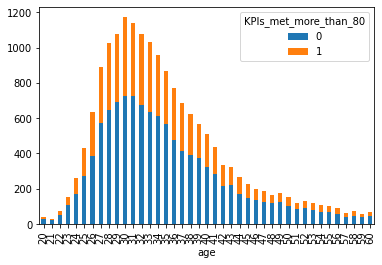

In [669]:
dataemployees.pivot_table(values='employee_id',index='age',columns='KPIs_met_more_than_80',aggfunc='size').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='previous_year_rating', ylabel='Count'>

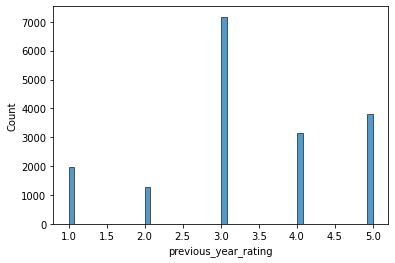

In [670]:
sbn.histplot(dataemployees.previous_year_rating)

<AxesSubplot:xlabel='previous_year_rating'>

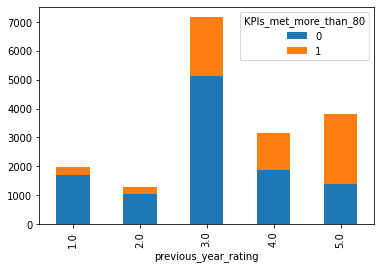

In [671]:
dataemployees.pivot_table(values='employee_id',index='previous_year_rating',columns='KPIs_met_more_than_80',aggfunc='size').plot(kind='bar', stacked=True)

Experimentacion

In [ ]:
validaciondatos= dataemployees.copy()
validaciondatos.previous_year_rating.fillna(0,inplace=True)
validaciondatos.previous_year_rating.value_counts()

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

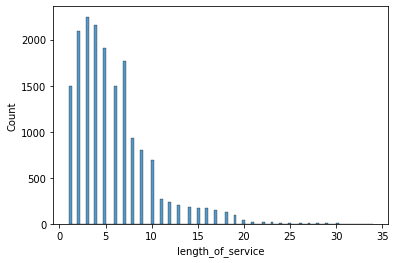

In [674]:
sbn.histplot(dataemployees.length_of_service)

In [672]:
dataemployees.length_of_service.describe()

count    17417.000000
mean         5.801860
std          4.175533
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         34.000000
Name: length_of_service, dtype: float64

<AxesSubplot:xlabel='length_of_service'>

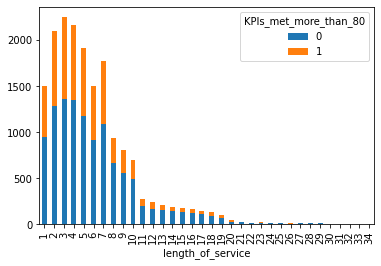

In [675]:
dataemployees.pivot_table(values='employee_id',index='length_of_service',columns='KPIs_met_more_than_80',aggfunc='size').plot(kind='bar', stacked=True)

In [ ]:
#Revision de KPI
sbn.histplot(data=dataemployees.KPIs_met_more_than_80)

In [ ]:
dataemployees.pivot_table(values='department',columns='KPIs_met_more_than_80',index='previous_year_rating',aggfunc='size')

In [ ]:
dataemployees.info()

In [ ]:
#Revision de KPI
sbn.histplot(data=dataemployees.awards_won)

In [ ]:
#Revision de KPI
sbn.histplot(data=dataemployees.avg_training_score)

In [ ]:
dataemployees.length_of_service.describe()

#Implementacion del modelo

In [643]:
dataemployees = pd.read_csv(r'C:\Users\juanm\Desktop\Provisional\Uncleaned_employees_final_dataset (1).csv')
valorrelleno= round(dataemployees.query("length_of_service==1 and previous_year_rating>0").previous_year_rating.mean(),0)
dataemployees.previous_year_rating.fillna(valorrelleno,inplace=True)
dataemployees.education.fillna('unknown',inplace=True)
dataemployees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              17417 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   17417 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [644]:
#Agregar columnas dummies para variables categoricas
dataemployees=pd.get_dummies(data=dataemployees,columns=['department','education','gender','recruitment_channel',],drop_first=True)

In [645]:
#Crear las variables con todo el dataframe
X_unbalanced=dataemployees[['no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 
       'awards_won', 'avg_training_score', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Masters & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing']]
y_unbalanced=dataemployees['KPIs_met_more_than_80']

# 3. Muestra Desbalanceada con Oversampling
oversampler = SMOTE(sampling_strategy='minority')
X, y = oversampler.fit_resample(X_unbalanced, y_unbalanced)


In [646]:
# K hace referencia a nuestras variables
# Utilizamos f_regression en nuestra medición
# Debe especificarse k
cantidadVariables=14
seleccion = SelectKBest(score_func=mutual_info_regression, k=cantidadVariables)
seleccion.fit_transform(X,y)
#La lista filtro indica cuales variables son las recomendadas
filtro = seleccion.get_support()
#Script para seleccionar las variables mas importantes
columnasOriginales=np.array(X.columns)
MejoresVariables=list(columnasOriginales[filtro])
print(MejoresVariables)
#Se ajusta X
X=X[MejoresVariables]
X.head(5)

['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'department_HR', 'department_Operations', 'department_Procurement', 'department_Technology', 'education_Masters & above', 'gender_m', 'recruitment_channel_referred', 'recruitment_channel_sourcing']


,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_HR,department_Operations,department_Procurement,department_Technology,education_Masters & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,0,77,0,0,0,1,0,1,0,1
1,1,31,3.0,5,0,51,1,0,0,0,0,0,0,0
2,1,31,1.0,4,0,47,0,0,0,0,0,1,0,0
3,3,31,2.0,9,0,65,0,0,1,0,0,0,0,0
4,1,30,4.0,7,0,61,0,0,0,0,0,1,0,1


# bosque aleatorio

In [647]:
hyperparameters = {
    'n_estimators': [5,10,20],  # Número de árboles
    'max_depth': [5, 10, 15],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 4, 6]  # Número mínimo de muestras necesarias para dividir un nodo
}

In [648]:
# Se crea la instancia del clasificador
modeloRFCInicial = RandomForestClassifier()

In [649]:
# Creamos un objeto GridSearchCV
grid_cv = GridSearchCV(estimator=modeloRFCInicial,
                       param_grid=hyperparameters,
                       scoring=make_scorer(accuracy_score),
                       cv=5)

In [650]:
# Separar los datos en entrenamientos y evaluacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Entrenamos el GridSearchCV con los datos de entrenamiento
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [5, 10, 20]},
             scoring=make_scorer(accuracy_score))

In [651]:
# Obtenemos el mejor modelo y lo asignamos a la variable modeloRFC
modeloRFC = grid_cv.best_estimator_
# Identificar los resultados de la validacion cruzada y mejores hiperparametros
best_params = grid_cv.best_params_
best_score = grid_cv.best_score_
print(f"El mejor conjunto de hiperparámetros es: {best_params}")
print(f"La mejor puntuación de validación cruzada obtenida fue: {best_score}")

El mejor conjunto de hiperparámetros es: {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 20}
La mejor puntuación de validación cruzada obtenida fue: 0.7216142155265033


In [652]:
# Realizamos las predicciones con los datos del X_test
y_pred_rfc = modeloRFC.predict(X_test)

In [653]:
#Validar metricas del modelo
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_rfc) :.2%}")
print(f"Precision: {metrics.precision_score(y_test, y_pred_rfc) :.2%}")
print(f"Recall: {metrics.recall_score(y_test, y_pred_rfc) :.2%}")
print("--Reporte de clasificación--")
print(metrics.classification_report(y_test, y_pred_rfc, digits=3))

Accuracy: 72.35%
Precision: 73.75%
Recall: 70.74%
--Reporte de clasificación--
              precision    recall  f1-score   support

           0      0.710     0.740     0.725      3297
           1      0.738     0.707     0.722      3404

    accuracy                          0.723      6701
   macro avg      0.724     0.724     0.723      6701
weighted avg      0.724     0.723     0.723      6701



In [637]:
# Debe especificarse k
for cantidadVariables in range(2,23,2):
    print(f"---INICIA CON ---{cantidadVariables} VARIABLES")
    dataemployees = pd.read_csv(r'C:\Users\juanm\Desktop\Provisional\Uncleaned_employees_final_dataset (1).csv')
    valorrelleno= round(dataemployees.query("length_of_service==1 and previous_year_rating>0").previous_year_rating.mean(),0)
    dataemployees.previous_year_rating.fillna(valorrelleno,inplace=True)
    dataemployees.education.fillna('unknown',inplace=True)
    #Agregar columnas dummies para variables categoricas
    dataemployees=pd.get_dummies(data=dataemployees,columns=['department','education','gender','recruitment_channel',],drop_first=True)
    #Crear las variables con todo el dataframe
    X_unbalanced=dataemployees[['no_of_trainings', 'age',
        'previous_year_rating', 'length_of_service', 
        'awards_won', 'avg_training_score', 'department_Finance',
        'department_HR', 'department_Legal', 'department_Operations',
        'department_Procurement', 'department_R&D',
        'department_Sales & Marketing', 'department_Technology',
        'education_Below Secondary', 'education_Masters & above', 'gender_m',
        'recruitment_channel_referred', 'recruitment_channel_sourcing']]
    y_unbalanced=dataemployees['KPIs_met_more_than_80']
    # 3. Muestra Desbalanceada con Oversampling
    oversampler = SMOTE(sampling_strategy='minority')
    X, y = oversampler.fit_resample(X_unbalanced, y_unbalanced)
    # K hace referencia a nuestras variables
    # Utilizamos f_regression en nuestra medición
    seleccion = SelectKBest(score_func=mutual_info_regression, k=cantidadVariables)
    seleccion.fit_transform(X,y)
    #La lista filtro indica cuales variables son las recomendadas
    filtro = seleccion.get_support()
    #Script para seleccionar las variables mas importantes
    columnasOriginales=np.array(X.columns)
    MejoresVariables=list(columnasOriginales[filtro])
    print(MejoresVariables)
    #Se ajusta X
    X=X[MejoresVariables]
    hyperparameters = {
        'n_estimators': [5,10,20,50],  # Número de árboles
        'max_depth': [5, 10, 15,20],  # Profundidad máxima de los árboles
        'min_samples_split': [2, 4, 6,10]  # Número mínimo de muestras necesarias para dividir un nodo
    }
    # Se crea la instancia del clasificador
    modeloRFCInicial = RandomForestClassifier()
    # Creamos un objeto GridSearchCV
    grid_cv = GridSearchCV(estimator=modeloRFCInicial,
                        param_grid=hyperparameters,
                        scoring=make_scorer(accuracy_score),
                        cv=5)
    # Separar los datos en entrenamientos y evaluacion
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Entrenamos el GridSearchCV con los datos de entrenamiento
    grid_cv.fit(X_train, y_train)
    # Obtenemos el mejor modelo y lo asignamos a la variable modeloRFC
    modeloRFC = grid_cv.best_estimator_
    # Identificar los resultados de la validacion cruzada y mejores hiperparametros
    best_params = grid_cv.best_params_
    best_score = grid_cv.best_score_
    print(f"El mejor conjunto de hiperparámetros es: {best_params}")
    print(f"La mejor puntuación de validación cruzada obtenida fue: {best_score}")
    # Realizamos las predicciones con los datos del X_test
    y_pred_rfc = modeloRFC.predict(X_test)
    #Validar metricas del modelo
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_rfc) :.2%}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred_rfc) :.2%}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred_rfc) :.2%}")
    print("--Reporte de clasificación--")
    print(metrics.classification_report(y_test, y_pred_rfc, digits=3))
    print(f"---FINALIZA CON ---{cantidadVariables} VARIABLES")

---INICIA CON ---2 VARIABLES
['no_of_trainings', 'previous_year_rating']
El mejor conjunto de hiperparámetros es: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 5}
La mejor puntuación de validación cruzada obtenida fue: 0.6919971371872865
Accuracy: 68.54%
Precision: 80.83%
Recall: 49.91%
--Reporte de clasificación--
              precision    recall  f1-score   support

           0      0.629     0.878     0.733      3297
           1      0.808     0.499     0.617      3404

    accuracy                          0.685      6701
   macro avg      0.719     0.688     0.675      6701
weighted avg      0.720     0.685     0.674      6701

---FINALIZA CON ---2 VARIABLES
---INICIA CON ---4 VARIABLES
['no_of_trainings', 'previous_year_rating', 'department_HR', 'recruitment_channel_referred']
El mejor conjunto de hiperparámetros es: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 5}
La mejor puntuación de validación cruzada obtenida fue: 0.6887990406549277
Accuracy: 68.

ValueError: k should be <= n_features = 19; got 20. Use k='all' to return all features.